In [1]:
import numpy as np
import json

import pandas as pd

import matplotlib.pyplot as plt

from scipy.spatial.distance import directed_hausdorff

"""
    directed_hausdorff
    @parameters: two input arrays (U, V)
    seed: int or none
    
    @output: d: double - the directed hausdorff distance between the two arrays
    index1: index of point contributing to hausdorff pair in U
    index2: index of point contributing to hausdorff pair in V
"""

'\n    directed_hausdorff\n    @parameters: two input arrays (U, V)\n    seed: int or none\n    \n    @output: d: double - the directed hausdorff distance between the two arrays\n    index1: index of point contributing to hausdorff pair in U\n    index2: index of point contributing to hausdorff pair in V\n'

In [2]:
with open('0.2.json') as f:
    data1 = json.load(f)
    
with open('0.14.json') as f:
    data2 = json.load(f)

In [3]:
df1 = pd.json_normalize(data1[0]).to_numpy()
df2 = pd.json_normalize(data2[0]).to_numpy()


In [4]:
directed_hausdorff(df1, df2)

(0.31066561203325993, 30, 43)

In [5]:
directed_hausdorff(df2, df1)

(0.2769795893202239, 43, 29)

In [6]:
max(directed_hausdorff(df1, df2)[0], directed_hausdorff(df2, df1)[0])

0.31066561203325993

In [7]:
directed_hausdorff(df1, df2)

(0.31066561203325993, 30, 43)

AttributeError: module 'skimage.metrics' has no attribute 'hausdorff_pair'

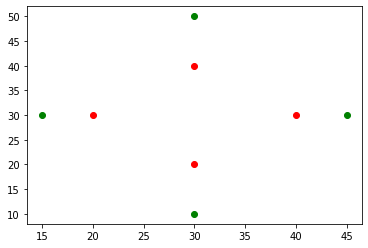

In [12]:
import matplotlib.pyplot as plt
import numpy as np

from skimage import metrics

shape = (60, 60)
image = np.zeros(shape)

# Create a diamond-like shape where the four corners form the 1st set of points
x_diamond = 30
y_diamond = 30
r = 10

fig, ax = plt.subplots()
plt_x = [0, 1, 0, -1]
plt_y = [1, 0, -1, 0]

set_ax = [(x_diamond + r * x) for x in plt_x]
set_ay = [(y_diamond + r * y) for y in plt_y]
plt.plot(set_ax, set_ay, 'or')

# Create a kite-like shape where the four corners form the 2nd set of points
x_kite = 30
y_kite = 30
x_r = 15
y_r = 20

set_bx = [(x_kite + x_r * x) for x in plt_x]
set_by = [(y_kite + y_r * y) for y in plt_y]
plt.plot(set_bx, set_by, 'og')

# Set up the data to compute the Hausdorff distance
coords_a = np.zeros(shape, dtype=bool)
coords_b = np.zeros(shape, dtype=bool)
for x, y in zip(set_ax, set_ay):
    coords_a[(x, y)] = True

for x, y in zip(set_bx, set_by):
    coords_b[(x, y)] = True

# Call the Hausdorff function on the coordinates
metrics.hausdorff_distance(coords_a, coords_b)
hausdorff_point_a, hausdorff_point_b = metrics.hausdorff_pair(coords_a,
                                                              coords_b)

# Plot the lines that shows the length of the Hausdorff distance
x_line = [30, 30]
y_line = [20, 10]
plt.plot(x_line, y_line, 'y')

x_line = [30, 30]
y_line = [40, 50]
plt.plot(x_line, y_line, 'y')

# Plot circles to show that at this distance, the Hausdorff distance can
# travel to its nearest neighbor (in this case, from the kite to diamond)
ax.add_artist(plt.Circle((30, 10), 10, color='y', fill=None))
ax.add_artist(plt.Circle((30, 50), 10, color='y', fill=None))
ax.add_artist(plt.Circle((15, 30), 10, color='y', fill=None))
ax.add_artist(plt.Circle((45, 30), 10, color='y', fill=None))

# Annotate the returned pair of points that are Hausdorff distance apart
ax.annotate('a', xy=hausdorff_point_a, xytext=(35, 15),
            arrowprops=dict(facecolor='red', shrink=0.005))
ax.annotate('b', xy=hausdorff_point_b, xytext=(35, 5),
            arrowprops=dict(facecolor='green', shrink=0.005))

ax.imshow(image, cmap=plt.cm.gray)
ax.axis((0, 60, 60, 0))
plt.show()